# Machine Learning I, Programming Exercise 0

The first sheet is aimed at getting you accustomed with the basic tools you need in order to code machine learning applications in Python. We will go through them each at a time and apply them to a machine learning problem in the last part of this exercise.

The idea is that a basic skeleton and some glue code for each exercise is already prepared for you, but you are, of course, free to play around with everything and change the code whenever you feel like it.

If you can read this, you have probably managed to set up a Python installation with a working Jupyter server. Good Job so far! In case you have never used a Jupyter Notebook before, you might be wondering what it is all about. The goal of a notebook is to keep documentation, code and output in one place, making it a great tool for explaining concepts and research discoveries to other people. Each notebook is made of two types of cells:
* **Markdown** cells containing formatted text (like this one)
* **Code** cells containing Python code that can be run from the browser. To do so press the run button at the toolbar above the notebook or press `Ctrl`+`Enter` to run the highlighted code cell.

Note that global variables and imports from one cell are preserved and available to subsequently executed cells. It is possible to execute the code cells in any arbitrary order, however this notebook is designed to run from top to bottom, since later cells depend on imports and variables from earlier ones. Besides, it is also a good idea to execute the cells one by one and instead of just running the whole notebook at once. That gives you the opportunity to read the code beforehand and perform any modifications that might be needed on your system.

## 1. Numpy
First, we will install the Numpy package designed for numerical computations. Since Python comes with a built-in package manager on most systems this is surprisingly easy: Just change the command in the following cell depending on whether you use `conda` or `pip`.

In [1]:
import sys

# If you have installed your Python environment using conda (which I'd recommend),
# the following line should do the job:
!conda install --yes --prefix {sys.prefix} numpy
# Or in case you don't use conda comment the previous line and try using pip instead:
# !{sys.executable} -m pip install numpy

Solving environment: done

# All requested packages already installed.



In [2]:
import numpy as np

After importing the library, we can now start working with the provided routines and data types.

### 1.1 Array Creation & Shape
The fundamental data structure in Numpy is the multi-dimensional `ndarray`. It behaves much like a high-level version of an array in lower level languages like C and can hold a variety of data types. Once created, neither size nor datatype can be changed and unlike with a python list each element needs to be of the same data type.

It is easy to create arrays from lists and other iterable objects in python:

In [3]:
x = np.array([1,2,3,4,5,6,7,8])
print(f'x shape: {x.shape}, dtype {x.dtype}.')
y = np.array([[1,2,3,4], [5.0,6,7,8]])
print(f'y shape: {y.shape}, dtype {y.dtype}.')
z = np.array(list('Hello World!'))
print(f'z shape: {z.shape}, dtype {z.dtype}.')

x shape: (8,), dtype int64.
y shape: (2, 4), dtype float64.
z shape: (12,), dtype <U1.


Apart from that, there are also factory methods available to create special arrays:

In [4]:
a = np.zeros((2, 4))  # Arry filled with zeros
print(f'a shape: {a.shape}, dtype {a.dtype}.')
b = np.random.rand(8)  # Each element is independently drawn from a uniform distribution on the interval [0, 1]
print(f'b shape: {b.shape}, dtype {b.dtype}.')
c = np.arange(start=1, stop=9)  # Returns an array with elements [start, start+1, ..., stop-1]
print(np.all(x == c))

a shape: (2, 4), dtype float64.
b shape: (8,), dtype float64.
True


While it is not possible to change the *size* of an array once it is created, changing the *shape* is quite easy, as long as the new shape fits the size of the array. Note that such a `reshape` operation does not return a copy of the original array, instead it is just a *view* to the same memory location that can be indexed in a different way.

In [5]:
print(x.reshape(2, 4))
print(x.reshape(4, -1))  # -1 means that the number in this dimension should be computed automatically

[[1 2 3 4]
 [5 6 7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


Multiple arrays of matching shape can also be 'stacked' together in a single array. However, this operation creates the resulting array in a new memory location, i.e, a copy needs to be performed. The position of the newly created axis can be controlled by the `axis` keyword. It is also possible to concatenate two arrays along an existing axis.

In [6]:
print(np.stack([x.reshape(2, 4), y], axis=0).shape)  # Create new axis as the first axis
print(np.stack([x.reshape(2, 4), y], axis=2).shape)  # Create new axis as the last axis
print(np.concatenate([x.reshape(2, 4), y], axis=0).shape)  # Concatenate along the existing first axis

(2, 2, 4)
(2, 4, 2)
(4, 4)


### 1.2 Basic Arithmetic Operations
Arithmetic operations are usually computed on a per-element basis, that means they are separately applied to each element in the array. Since Numpy overloads most python operators for the `ndarray` class, it is easy to write code that works with scalars as well as arrays:  

In [7]:
def f(a, b):
    return np.sqrt(a**2 + b**2)

print(f(3, 4))
print(f(np.arange(5), np.ones((5,))))

5.0
[1.         1.41421356 2.23606798 3.16227766 4.12310563]


Aside from arithmetic operations, comparisons are also supported on a per element basis:

In [8]:
a = np.array([5, 3, 7, 4, 8, 1])
b = np.array([4, 6, 3, 4, 7, 9])
print(a >= b)
print((a<3) | (a>6))  # Note that the bitwise or operator is used instead of logical or.
                      # For Numpy arrays this corresponds to an element-wise or.

[ True False  True  True  True False]
[False False  True False  True  True]


An important concept when it comes to element-wise operations is called *broadcasting*. It allows us to use arrays of different shapes for the same operation in a meaningful way. One special case of that is the use of a scalar and an `ndarray` in the same operation:

In [9]:
print(x + 2)

[ 3  4  5  6  7  8  9 10]


Here the value `2` is 'broadcast' two every element of `x`, making this equivalent to the follwing:

In [10]:
print(x + np.array([2, 2, 2, 2, 2, 2, 2, 2]))

[ 3  4  5  6  7  8  9 10]


The only difference is that no memory is wasted for a second array of the same size as `x`. This concept also carries over to multi-dimensional arrays, as long as they have the same number of elements in all but one axis and one array has only one element in that axis.

In [11]:
print(y + np.array([[4, 3, 2, 1]]))
a = np.random.rand(12, 13, 6, 4, 5)
b = np.random.rand(12, 1, 6, 4, 5)
print((a - b).shape)

[[5. 5. 5. 5.]
 [9. 9. 9. 9.]]
(12, 13, 6, 4, 5)


Apart from the element-wise operations there also exist reduction functions that aggregate one or several axes of an array. Most common operations are supported:

In [12]:
print(np.sum(y))
print(np.max(x))
print(np.mean(y, axis=1))
print(np.prod(y, axis=1, keepdims=True))

36.0
8
[2.5 6.5]
[[  24.]
 [1680.]]


### 1.3 Array Indexing
Elements within an array can be accessed by using square brackets, just like in normal python lists. In multi-dimensional arrays, one index for each dimension can be specified. Negative indices are counted backwards from the last element

In [13]:
print(x[3])
print(y[-1])
print(y[-1, 1])

4
[5. 6. 7. 8.]
6.0


It is also possible to access *slices* of an array by specifying `start:stop:step` instead of an integer as an index for the dimension that should be sliced:

In [14]:
print(x[1:6])
print(x[:5])  # Select first 5 elements
print(x[-5:])  # Select last 5 elements
print(x[::-1])  # Reverse x
print(y[:, 1])  # select 2nd column of y, a single colon means that the whole axis should be selected

[2 3 4 5 6]
[1 2 3 4 5]
[4 5 6 7 8]
[8 7 6 5 4 3 2 1]
[2. 6.]


Furthermore, you can index a Numpy array with another Numpy array. This is called *advanced indexing* and the way it works depends on the type of the index array:
* `bool`: Indexing with a boolean array works like a mask: Only those elements where the index is true are selected in the new array. The boolean array must be of the same shape as the array we wish to select from
* `int`: The indices are used to select specific elements from the array. One index array per axis is needed.

In [15]:
idx1 = np.array([True, True, True, False, False, True, True, False])
print(x[idx1])
idx2 = np.array([0, 1, 2, 5, 6])
print(x[idx2])
idx3 = np.array([0, 2, 3])
print(y[0, idx3])

[1 2 3 6 7]
[1 2 3 6 7]
[1. 3. 4.]


### 1.4 Linear Algebra Operations
Numpy also supports all basic linear algebra operations such as matrix-matrix multiplication and matrix-vector multiplication. No special dataypes are needed for that, instead Numpy treats 2D arrays as matrices and 1D arrays as vectors:

In [16]:
A = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
B = np.eye(3)  # Identity matrix
b = np.array([0, 1, 0])
print(np.matmul(A, B))
print(np.matmul(A, b))  # np.matmul supports matrix-matrix and matrix-vector products
print(np.dot(b, b))  # inner (scalar) product of two vectors

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[1 4 7]
1


### Ex. 1.5 One-Liners
The following exercises can all be solved by just writing one line of code for each, possibly combining several of the concepts mentioned above. It is also possible to solve them with only the functions that have been introduced or used up until this point! And that is exactly what you should do: **Write one line of code using only the given functions!** Well, at least for this exercise in order to become familiar with the 'Numpy way of thinking', otherwise it is usually a good idea to prefer readability over brevity when it comes to code.

1. Given a matrix $A = (\begin{matrix}\mathbf{a}_1 & \mathbf{a}_2 & \ldots & \mathbf{a}_{20} \end{matrix}) \in \mathbb{R}^{20 \times 20}$, compute the matrix 
\begin{equation*}
    A' = \left(\begin{matrix}\frac{\mathbf{a}_1}{\lVert \mathbf{a}_1 \rVert_2} & \frac{\mathbf{a}_2}{\lVert \mathbf{a}_2 \rVert_2} & \ldots & \frac{\mathbf{a}_{20}}{\lVert \mathbf{a}_{20} \rVert_2} \end{matrix}\right),
\end{equation*}
i.e., divide each column vector by its Euclidean norm.

In [17]:
A = np.random.rand(20, 20)
A /= np.sqrt(np.sum(A**2, axis=0, keepdims=True))

2. Print the indices of all elements in `arr` that are larger or equal to 32 and smaller than 64.

In [18]:
arr = np.random.randint(0, 100, size=10)
print(arr)
print(np.arange(0, 10)[(32 <= arr) & (arr < 64)])

[61 17 49 98 11 34 24 29 56 34]
[0 2 5 8 9]


3. Given array `arr`, compute a new array of the same length as follows: `arr2[i] = sqrt(arr[i-1]) + arr[i])`, where out of bounds indices should be mapped to the other end of the array, like in a ring buffer.

In [19]:
arr = np.random.randint(0, 100, size=10)
print(arr)
print(np.sqrt(arr[np.arange(10)-1]) + arr)

[72 70 84 41 41 60 33 39  2 40]
[78.32455532 78.48528137 92.36660027 50.16515139 47.40312424 66.40312424
 40.74596669 44.74456265  8.244998   41.41421356]


4. Given array `arr` compute the 1D max pooling operation with a window size of 3. In other words, partition the array into blocks of 3 elements and only return the maximum element from each block.

In [20]:
arr = np.random.randint(0, 100, size=30)
print(arr)
print(np.max(arr.reshape(-1, 3), axis=1))

[ 2 74 90 11 66 80 76 69 26 50 81 31 11 13 90 68  4 77 79 65 36 66 16 35
 20 24 56 34 96 42]
[90 80 76 81 90 77 79 66 56 96]


5. Assume you are given two sets of vectors: $\mathcal{S} = \{\mathbf{s}_1, \mathbf{s}_2, \ldots, \mathbf{s}_{20}\}$ and $\mathcal{T} = \{\mathbf{t}_1, \mathbf{t}_2, \ldots, \mathbf{t}_{15}\}$, where $\mathbf{s}_i, \mathbf{t}_j \in \mathbb{R}^{10}$ for all $i, j$. Compute the dot product for every possible combination of vectors from $\mathcal{S}$ and $\mathcal{T}$, i.e.,
\begin{equation*}
    \langle \mathbf{s}_i, \mathbf{t}_j \rangle \quad \text{for all } i \in \{1, \ldots, 20\}, j \in \{1, \ldots, 15\}
\end{equation*}

In [21]:
S = [np.random.rand(10) for _ in range(20)]
T = [np.random.rand(10) for _ in range(15)]
print(np.dot(S[2], T[3]))
res = np.matmul(np.stack(S, axis=0), np.stack(T, axis=-1))
print(res[2, 3])

2.546988937269551
2.5469889372695507


### Ex. 1.6 The Jacobi Method
The Jacobi method is an iterative algorithm to solve a system of linear equations $Ax = b$, where $A \in \mathbb{R}^{n \times n}$ is a diagonally dominant matrix, meaning that
\begin{equation*}
    \lvert A_{ii} \rvert > \sum_{j\neq i} \lvert A_{ij} \rvert
\end{equation*}
or in words that the absolute value of each diagonal element is larger than the sum of absolute values of the rest of the corresponding row.

The algorithm produces a sequence of iterates $x^{(1)}, x^{(2)}, \ldots$, where the starting point $x^{(0)}$ can be freely chosen. In each iteration, the following update is performed:
\begin{equation*}
    x^{(t+1)}_{i} = \frac{1}{A_{ii}} \left(b_i - \sum_{j \neq i} A_{ij} x^{(t)}_{j} \right).
\end{equation*}

Termination can be ensured by checking whether two subsequent iterates are sufficietly close, i.e., whether $\lVert x^{(t+1)} - x^{(t)} \rVert \leq \varepsilon$ for some small $\varepsilon > 0$ or by enforcing a maximum number of iterations.

Your tasks are as follows:
1. Generate a random but diagonally dominant matrix $A$ and a random vector $b$. Choose $n=20$.
2. Implement the Jacobi method. This consists of two parts:
   * Check if the given matrix is actually square and diagonally dominant.
   * Implement the update step given above. Terminate after 1000 iterations or when the Euclidean distance between two subsequent iterates becomes less than $\varepsilon = 10^{-8}$. Don't use any additional loops for that!

In [22]:
def jacobi(A, b, x_0=None, max_iter=1000, eps=1e-8):
    # Check if A is diagonally dominant and square
    # start student TODO
    n = A.shape[0]
    assert A.ndim == 2 and n == A.shape[1] 
    abs_sum = np.sum(np.abs(A), axis=1)
    diag_ind = np.arange(n)
    diagonal = A[diag_ind, diag_ind]
    assert np.all(2*np.abs(diagonal) >= abs_sum)
    # end student TODO
    
    x = np.zeros(n) if x_0 is None else x_0
    # begin student TODO
    A_it = A - np.diag(diagonal)
    # end student TODO
    
    for i in range(max_iter):
        # Perform Jacobi iteration
        # Begin student TODO
        x_old = x
        x = (b - np.matmul(A_it, x_old)) / diagonal
        
        # Test convergence
        if np.sum((x - x_old)**2) < eps*eps:
            break
    
    if i == max_iter-1:
        print('Max. iterations reached!')
    else:
        print('Solution found after %d iterations.' % i)
    
    # end student TODO
    
    return x

# Generate random, diagonally dominant matrix
n = 20
# begin student TODO
A = np.random.rand(n, n)
abs_sum = np.sum(np.abs(A), axis=1)
A += np.diag(abs_sum)
# Generate random b
b = np.random.rand(n)
# end student TODO

# Run Jacobi method
x = jacobi(A, b)

# Check if solution is correct
Ax = np.matmul(A, x)
print(f'Ax is {Ax}')
print(f'b is {b}')
assert(np.allclose(Ax, b))

Solution found after 170 iterations.
Ax is [0.5937386  0.31258489 0.78467491 0.41265212 0.69307234 0.67464721
 0.17703023 0.74916391 0.8591612  0.04286332 0.4340154  0.20415202
 0.39450749 0.48761947 0.58194304 0.54414657 0.08261086 0.10858541
 0.97473704 0.54354159]
b is [0.59373858 0.31258488 0.78467489 0.4126521  0.69307231 0.67464719
 0.17703021 0.7491639  0.85916118 0.04286331 0.43401538 0.20415201
 0.39450747 0.48761945 0.58194302 0.54414655 0.08261084 0.1085854
 0.97473702 0.54354157]


## 2. Matplotlib
[Matplotlib](https://matplotlib.org/) is a (data) visualization library for Python. While it is perhaps not the easiest to learn and the API can be quite obscure in some places, it is widely used in academia and therefore worth having a look at. The amount of things that you can realise with the library is almost limitless, so we can only treat the very basics in this exercise. MATLAB users will find that Matplotlib supports MATLABS's native plotting commands almost completely, which is also one of the library's explicit goals.

Installing the library is easy with the package manager of your choice:

In [23]:
!conda install --yes --prefix {sys.prefix} matplotlib
# !{sys.executable} -m pip install matplotlib

Solving environment: done

# All requested packages already installed.



There are multiple APIs with which we as a programmer can access the functions of Matplotlib. The easiest to get started with is probably the MATLAB-like API contained in the `matplotlib.pyplot` package. Luckily, Jupyter Notebook and Matplotlib work nicely together, so that you can make your plots show up directly in the notebook instead of a separate window:

In [24]:
# magic command that enables plots to be shown directly in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

### 2.1 Figures and Plots
*Figures* in Matplotlib are similar to a canvas in that they can hold multiple *plots*. Those plots could be visualizations of any kind of data in a multitude of ways (see part 2.2 for a non-exhaustive list). Therefore, the starting point of working with Matplotlib is to create a figure that is now considered "active" and all subsequent plotting commands will be applied to it:

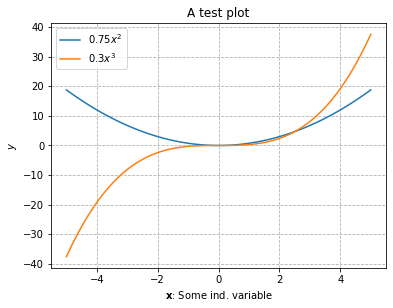

In [25]:
x = np.linspace(-5, 5, num=100)  # Create an array with 100 points evenly spaced in the interval (-5, 5)
y = 0.75*x**2

fig = plt.figure(figsize=(6, 4.5))  # (width, height), given in inches
plt.title('A test plot')
plt.xlabel(r'$\mathbf{x}$: Some ind. variable')  # Note that LaTeX-Code is supported
plt.ylabel('$y$')
plt.plot(x, y, label=r'$0.75 x^2$')
plt.plot(x, 0.3*x**3, label=r'$0.3 x^3$')
plt.grid(linestyle='dashed')
plt.legend()

plt.show()
plt.close(fig)

As mentioned earlier, it is also possible to have multiple plots in one figure. This is accomplished by calling the `subplots` function and using the returned `Axes` objects:

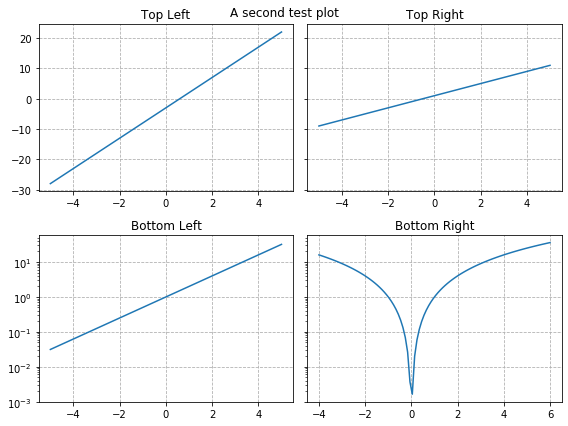

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey='row', figsize=(8, 6))
fig.suptitle('A second test plot')

axes[0, 0].set_title('Top Left')
axes[0, 0].plot(x, 5*x-3)

axes[0, 1].set_title('Top Right')
axes[0, 1].plot(x, 2*x + 1)

axes[1, 0].set_title('Bottom Left')
axes[1, 0].plot(x, 2**x)
axes[1, 0].set_yscale('log')

axes[1, 1].set_title('Bottom Right')
axes[1, 1].plot(x+1, (x+1)**2)

for ax in axes.ravel():
    ax.grid(linestyle='dashed')

fig.tight_layout()
plt.show()
plt.close(fig)

### 2.2 Plot Types
The library offers many types of visualization routines for a variety of data, too many to cover them all in this notebook. The following cell will contain a few select examples examples of what can be done with Matplotlib. If you want to know more, it is always a good idea to have a look at the [documentation](https://matplotlib.org/contents.html).

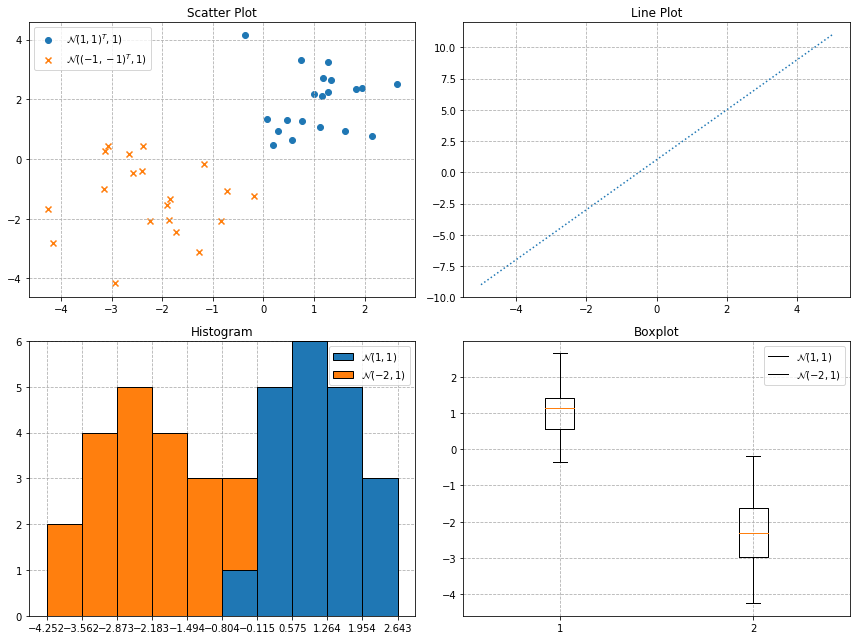

In [27]:
data1 = np.random.normal(loc=np.array([1, 2]), size=(20, 2))
data2 = np.random.normal(loc=np.array([-2, -1]), size=(20, 2))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12, 9))

axes[0, 0].set_title('Scatter Plot')
axes[0, 0].scatter(data1[:, 0], data1[:, 1], label=r'$\mathcal{N}(1, 1)^T, 1)$')
axes[0, 0].scatter(data2[:, 0], data2[:, 1], label=r'$\mathcal{N}((-1, -1)^T, 1)$', marker='x')
axes[0, 0].legend()

axes[0, 1].set_title('Line Plot')
axes[0, 1].plot(x, 2*x + 1, linestyle='dotted')

axes[1, 0].set_title('Histogram')
_, bins, _ = axes[1, 0].hist([data1[:, 0], data2[:, 0]], bins=10, edgecolor='k', zorder=3, stacked=True)
axes[1, 0].set_xticks(bins)
axes[1, 0].legend([r'$\mathcal{N}(1, 1)$', r'$\mathcal{N}(-2, 1)$'])

axes[1, 1].set_title('Boxplot')
axes[1, 1].boxplot([data1[:, 0], data2[:, 0]], zorder=3)
axes[1, 1].legend([r'$\mathcal{N}(1, 1)$', r'$\mathcal{N}(-2, 1)$'])

for ax in axes.ravel():
    ax.grid(linestyle='dashed')

fig.tight_layout()
plt.show()
plt.close(fig)

### Ex. 2.3 SARS-CoV-2
The Severe Acute Respiratory Syndrome Coronavirus-2 (SARS-CoV-2) and the disease caused by it, COVID-19, have had a major impact on the lives of people here in Germany and many more countries throughout the world during the last few weeks or even months. If you are not too tired of hearing and reading about it in the news day in and day out, you'll have the opportuity to play around with some data concerning this global pandemic in this exercise.

For that, we will take data from the [ECDC Website](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) and process it locally. The .csv file you can find under "Download the data in more formats" contains one row per country and per day, organized in the following fields:
* `dateRep`: The date in `DD/MM/YYYY` format (e.g. `12.04.2020`).
* `day`, `month` and `year`: The same date again, but in separate fields.
* `countriesAndTerritories`: English name of the country. Spaces are replaced by an underscore (e.g. `United_States_of_America`).
* `geoId`, `countryterritoryCode`: Two-digit and three-digit country code (e.g. `US` and `USA`)
* `cases`: Number of people that were positively tested for the SARS-CoV-2 on that specific day in that specific country (e.g. `28391`).
* `deaths`: Number of people that died of COVID-19 (or perhaps other illnesses facilitated by the virus) on that specific day in that specific country (e.g. `
1831`).
* `popData2018`: The country's number of inhabitants as of 2018 (e.g. `327167434`)

The goal of this exercise is to compare the development of total SARS-CoV-2 cases in different countries. Specifically, we would like to plot the total cases at each day, starting from the day where the total cases first reached 100 in the respective country. Hence, your tasks are as follows:
1. Download the dataset and extract relevant parts in a format convenient for further processing. Think about which fields you need for the plot and which countries you want to compare. The code skeleton already contains a few lines that download the data in `.csv` format. If you prefer to use another data format offered by the ECDC Website, feel free to do so.
2. Compute the total (or cumulative) number for each day in the data that you extracted in the first step.
3. Filter out all days were the number of total cases was less than 100.
4. Create a plot with "Number of days since total cases first reached 100" as the x-axis and "Total SARS-CoV-2 cases" as the y-axis. Use a logarithmic scale for the y-axis and plot one curve for each country that you chose. Also include, as a reference, a hypothetical curve, where the number of cases starts with 100 and doubles every 5 days.

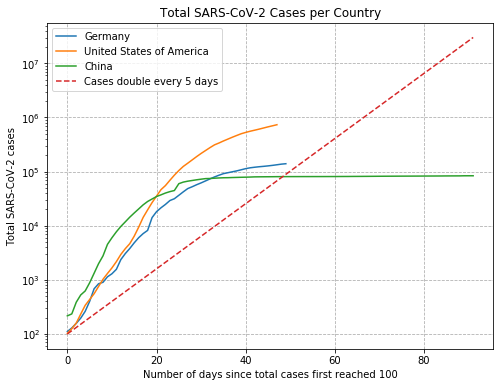

In [28]:
from urllib.request import urlopen
from datetime import date
import csv

def extract_data(reader, countries):
    result = {c: [] for c in countries}
    for row in reader:
        country = row['countriesAndTerritories']
        if country in countries:
            result[country].append([
                date(int(row['year']), int(row['month']), int(row['day'])),  # Date
                int(row['cases'])  # New Cases on that day
            ])

    return result

# Load Covid-19 data
countries = ['Germany', 'United_States_of_America', 'China']
with urlopen('http://opendata.ecdc.europa.eu/covid19/casedistribution/csv') as f:
    lines = [line.decode('utf-8') for line in f.readlines()]
reader = csv.DictReader(lines)
data = extract_data(reader, countries)

# TODO: Compute total cases for each day
# Ignore people who have recovered or died
plot_data = {k: [] for k in data.keys()}
for country, values in data.items():
    cumsum = 0
    # Sort by date in ascending order and sum up the cases
    for day in sorted(values, key=lambda x: x[0]):
        cumsum += day[1]
        day.append(cumsum)

# TODO: Create Data, starting from the day where
# 100 people have been infected
        if cumsum >= 100:
            plot_data[country].append(cumsum)

# TODO: hypothetical curve where total cases double
# every five days
def exp_double_time(x, start_cases=100, double_time=5):
    return start_cases*np.power(np.power(2, 1/double_time), x)

# TODO: Plot everything in a log-plot with legend
def display_name(country):
    return country.replace('_', ' ')

x = np.arange(start=0, stop=max(len(v) for v in plot_data.values()))
fig = plt.figure(figsize=(8, 6))
plt.title('Total SARS-CoV-2 Cases per Country')
plt.xlabel('Number of days since total cases first reached 100')
plt.ylabel('Total SARS-CoV-2 cases')
plt.yscale('log')
for country, values in plot_data.items():
    plt.plot(x[:len(values)], values, label=display_name(country))
plt.plot(x, exp_double_time(x), label='Cases double every 5 days', linestyle='dashed')
plt.legend()
plt.grid(linestyle='dashed')
plt.show()
plt.close(fig)

## 3. Scikit-Learn
[Scikit-Learn](https://scikit-learn.org/stable/index.html) is a popular and widely used library which contains numerous algorithms for machine learning and data analysis. Furthermore, it also contains tools for pre-processing data, evaluating models and many other utilities.

Installing the library is again as easy as issuing one command to the terminal:

In [29]:
!conda install --yes --prefix {sys.prefix} scikit-learn
# !{sys.executable} -m pip install scikit-learn

Solving environment: done

# All requested packages already installed.



### 3.1 Datasets
Any machine learnng algorithm needs some form of input data for training, from which it can recognize patterns and extract knowledge. Usually, several *data points* are collected in experimental or real-world scenarios and merged into a so-called *dataset*. While Scikit-Learn has several utilities for downloading, cleaning and preprocessing such datasets, we are not going use a real-world dataset for the purpose of ths exercise. Instead, we will use the function `make_moons` to generate an artifical, two-dimensional dataset in the following code segment. Play around with the `noise` value to see what the data looks like.

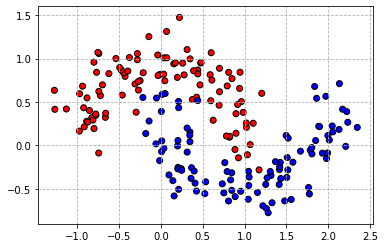

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate toy data (two moons dataset)
n = 200
X, Y = datasets.make_moons(n, noise=0.2)

# Plot the dataset
fig = plt.figure()
cmap = ListedColormap([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap, edgecolor='k')
plt.grid(linestyle='dashed')
plt.show()
plt.close(fig)

### 3.2 Classification Fundamentals
The goal of the classification task is to find a function $f$ that assigns a class label $y$, which is chosen from $K$ different possibilities, to a data point $x$. Training data for such a task is usually given as several input-output-pairs, i.e., $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$. For the two moons dataset, we would have $x \in \mathbb{R}^2$ and $K=2$ and we chose $n=200$.

One cool feature of Scikit-Learn is the unified API that makes it easy to switch between different classification algorithms on the fly. This is possible, since the algorithms are implemented as subclasses of `BaseEstimator` which, among others, offers the following fundamental methods:
* `fit(X, Y)`: This method trains a classifier, where `X` is a Numpy array of shape `(n, d)` containing `n` training examples and `Y` is another Numpy array containg the class labels for all `n` samples. The actual implementation differs significantly from algorithm to algorithm.
* `predict(X)`: Once the classifier has been trained with a call to `fit`, this method can be used to predict a class label for previously unseen datapoints `X` (which is again a Numpy array of shape `(n*, d)`)

The following code snippet uses the *Support-Vector-Machine* algorithm to find a classifier that can distinguish the two classes from the two moons dataset. We use both a linear SVM as well as a RBF-kernel SVM. Don't worry if you have never heard of those terms before, since they will be explained in great detail during the lecture! One great thing about libraries like Scikit-Learn is that you don't need to know how a Support Vector Machine works before you can use it, since the implementation is already available and the library is easily accessible, making it easier for people to get into machine learning. However, if you want to achieve consistently good results, knowledge about the algorithms you are using and a certain amount of experience are needed in order to know which knobs to tweak. So, it still makes sense to attend to lecture (at least digitally) :)

For the two-dimensional toy dataset used in this exercise it is also easy to draw the decision surface of the classifier. This means that a point within the blue surface would be classfied as blue by the classifier and a point in the read surface as belonging to the red class. As you can see by playing around, the boundary between the classes is always a line for the linear SVM, whereas it can have any shape for the RBF SVM.

There are several ways to evaluate and compare the performance of classifiers, but one easy and often used way is to separate a certain number of randomly chosen points from the given dataset (the *test set*) and use the rest to train the classifier (the *training set*). The percentage of correctly classified points in the test set, called *accuracy*, can then be seen as a measure of the *generalization* performance, i.e., the classifier's ability to transfer learned patterns to a set of similar data that it has never seen before. Scikit-Learn's `train_test_split` function implements exactly this split of data in training and test samples.

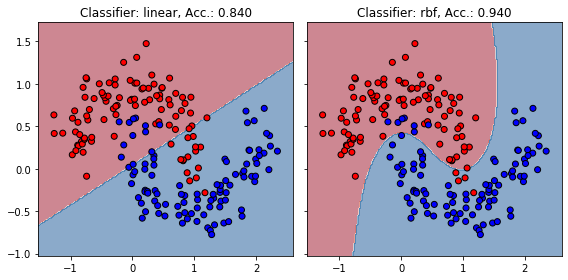

In [31]:
from sklearn.svm import SVC

# Train Classifier on the dataset
linear_clf = SVC(kernel='linear', C=0.1)
kernel_clf = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Plot decision surface
# First generate grid
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(X, axis=0) + 0.25
x_min, y_min = np.min(X, axis=0) - 0.25
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
for clf, ax in zip([linear_clf, kernel_clf], axes.ravel()):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    grid_out = clf.predict(grid_input).reshape(grid_x.shape)

    ax.set_title('Classifier: %s, Acc.: %.3f' % (str(clf.kernel), score))
    ax.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=plt.cm.RdBu)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap, edgecolor='k')
plt.tight_layout()
plt.show()
plt.close(fig)

### Ex. 3.3 Scikit-Learn API
1. Consider the following new artificial dataset:

In [32]:
new_X = X * np.array([1, 10])
new_Y = Y

   Try running the algorithms as they are on this dataset and also plot the decision regions (Tip: Modularize my code to make it reusable). What changes? Do you have any idea what could cause problems here?
2. One very commonly used technique to preprocess data is to rescale each input feature to have zero mean and unit variance before running a classifier on the data. This behaviour is already implemented by the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class. Also have a look at the [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class and use this to re-implement the traning procedure with an additinal data-normalization step. Create a new plot that compares the decision surfaces of classifiers trained on normalized data to those trained with non-normalized data.
3. The behaviour of both SVMs is influenced by the parameter `C` and the RBF SVM also accepts a paramter `gamma`. Snce those parameters are not learned as part of the algorithm, they are also called *hyperparameter*. Play around with those and see how the decision surface changes.
4. (optional) In part 3 you have probably seen that the value of hyperparameters can have a dramatic influence on the performance of the classifier. Tuning them by hand can be a tedious task and it is therefore preferred to automatcally try values from a specified range or even just random values. Check out the [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) class and try to find a good combination of hyperparameter values for the RBF SVM.

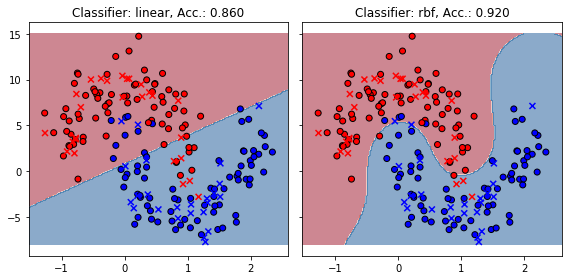

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Apply Preprocessing to scale data first
linear_pipe = Pipeline([('scaler', StandardScaler()), ('clf', linear_clf)])
kernel_pipe = Pipeline([('scaler', StandardScaler()), ('clf', kernel_clf)])

X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y, test_size=0.25)

# Plot decision surface
# First generate grid
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(new_X, axis=0) + 0.25
x_min, y_min = np.min(new_X, axis=0) - 0.25
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
for clf, ax in zip([linear_pipe, kernel_pipe], axes.ravel()):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    grid_out = clf.predict(grid_input).reshape(grid_x.shape)

    title = clf.kernel if isinstance(clf, SVC) else clf['clf'].kernel
    ax.set_title('Classifier: %s, Acc.: %.3f' % (str(title), score))
    ax.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=plt.cm.RdBu)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap, edgecolor='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap, edgecolor='k', marker='x')
plt.tight_layout()
plt.show()
plt.close(fig)

### Ex. 3.4 $k$-Nearest Neighbours
One of the simplest machine learning algorithms (in fact so simple that you will probably be able to find convincing arguments that it is not a machine learning algorithm at all) is the $k$-nearest neighbours algorithm. Given some training examples $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ and a test point $x^*$, for which we would like to predct a class label, the algorithm works as follows:
* **Training**: The training examples $\{(x_i, y_i\}_{i=1}^{n}$ are stored.
* **Prediction**: The $k$ training points with the least distance to $x^*$ are fetched along with their class labels, i.e.
\begin{equation*}
    P_{x^*}^k := \operatorname{arg\ min}_{\{y_{i_1}, \ldots, y_{i_k}\}} \sum_{j=1}^{k} d(x_{i_j}, x^*),
\end{equation*}
where $d$ is some distance measure. The class that appears most often in that set is then returned as the class label of $x^*$. In case of a tie, one could, for example, choose a class randomly or according to some other tie-breaker rule.

Your tasks are as follows:
1. Implement the $k$-nearest neighbours algorithm by filling in the gaps in the skeleton that has already been prepared for you. Use the Euclidean distance and when a tie occurs break it by randomly choosing one of the tied classes.
2. Note that the `KNN` class conforms to the API of Scikit-Learn. Compare its performance to the SVM based classifiers from the previous exercise and also explore what happens when you use different values for $k$. How do the decision surfaces for different values of $k$ look like when training on the two moons dataset?
3. Can you think of a disadvantage the KNN classifier might have when it is applied to real-world datasets?

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin

def euclidean_distance(a, b, keepdims=False):
    return np.sqrt(np.sum((a-b)**2, axis=-1, keepdims=keepdims))

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=5, dist_function=euclidean_distance):
        super(KNN, self).__init__()

        self.k = k
        self.dist_function = dist_function
        self.train_points = None

    def fit(self, X, y):
        self.train_points = X, y

    def predict(self, X):
        from collections import Counter
        import random
        
        if self.train_points is None:
            raise ValueError('Predict can only be called after supplying training data with fit first!')

        # Compute distance to each training point
        y_res = np.empty(X.shape[0], dtype=self.train_points[1].dtype)
        for i in range(X.shape[0]):
            dist = self.dist_function(self.train_points[0], X[i])
            # Get indices of k smallest elements
            knn = np.argpartition(dist, self.k)[:self.k]
            knn = self.train_points[1][knn]
            classes = Counter(knn).most_common()
            # Get all classes that have the same count as the maximum
            res = [classes[j][0] for j in range(len(classes)) if j==0 or classes[j-1][1] == classes[j][1]]
            y_res[i] = random.choice(res)

        return y_res